#                                                 Human Activity Recognition

###  Time Series Classification:

An interesting task in machine learning is classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.

### Accesing the Dataset

Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29 . The dataset contains 7 folders that represent seven types of activities. Ineach folder, there are multiple files each of which represents an instant of a human performing an activity. Each file containis 6 time series collected from activities of the same person. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pdb
import re
import warnings
warnings.filterwarnings('ignore')

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
   return [ atoi(c) for c in re.split('(\d+)', text) ]

### Splitting the data into test and train

In [4]:
bd1 = pd.DataFrame()
bd2 = pd.DataFrame()
cyc = pd.DataFrame()
lyng = pd.DataFrame()
sit = pd.DataFrame()
stnd = pd.DataFrame()
wlk = pd.DataFrame()

bd1_list = []
bd2_list = []
cyc_list = []
lyng_list = []
sit_list = []
stnd_list = []
wlk_list = []

activity_list = os.listdir('./AReM/')
 
for activity in activity_list:
    datalist = os.listdir('./AReM/'+activity)
    datalist.sort(key=natural_keys)
    for file in datalist: 
        if activity == 'bending1':
           bd1_list.append(pd.read_csv('./AReM/'+activity+'/'+file, header=4, usecols=[0, 1, 2, 3, 4, 5, 6]))
        elif activity == 'bending2':
           bd2_list.append(pd.read_csv('./AReM/'+activity+'/'+file, header=4, usecols=[0, 1, 2, 3, 4, 5, 6]))
        elif activity == 'cycling':
            cyc_list.append(pd.read_csv('./AReM/'+activity+'/'+file, header=4, usecols=[0, 1, 2, 3, 4, 5, 6]))
        elif activity == 'lying':    
            lyng_list.append(pd.read_csv('./AReM/'+activity+'/'+file, header=4, usecols=[0, 1, 2, 3, 4, 5, 6]))
        elif activity == 'sitting':    
            sit_list.append(pd.read_csv('./AReM/'+activity+'/'+file, header=4, usecols=[0, 1, 2, 3, 4, 5, 6]))
        elif activity == 'standing':
            stnd_list.append(pd.read_csv('./AReM/'+activity+'/'+file, header=4, usecols=[0, 1, 2, 3, 4, 5, 6]))
        else:    
            wlk_list.append(pd.read_csv('./AReM/'+activity+'/'+file, header=4, usecols=[0, 1, 2, 3, 4, 5, 6]))
bd1 = pd.concat(bd1_list, ignore_index=True)
bd2 = pd.concat(bd2_list, ignore_index=True)
cyc = pd.concat(cyc_list, ignore_index=True)
lyng = pd.concat(lyng_list, ignore_index=True)
sit = pd.concat(sit_list, ignore_index=True)
stnd = pd.concat(stnd_list, ignore_index=True)
wlk = pd.concat(wlk_list, ignore_index=True)

Data = pd.concat([bd1, bd2, cyc, lyng, sit, stnd, wlk], ignore_index=True)

#Splitting of Train and Test Data
test = pd.concat([ bd1.iloc[0:480+480], bd2.iloc[0:480+480], cyc.iloc[0:480+480+480], lyng.iloc[0:480+480+480], sit.iloc[0:480+480+480], 
                  stnd.iloc[0:480+480+480], wlk.iloc[0:480+480+480]], ignore_index=True) 
train = pd.concat([ bd1.iloc[480+480:], bd2.iloc[480+480:], cyc.iloc[480+480+480:], lyng.iloc[480+480+480:], sit.iloc[480+480+480:], 
                  stnd.iloc[480+480+480:], wlk.iloc[480+480+480:]],ignore_index=True)  

Data_test_train = pd.concat([test, train], ignore_index=True)


### Feature Extraction
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.
   
(i)Generally time domain features(mean, standard deviation, min, median, 1st quartile, max and 3rd quartile) are important in classification of time domain series.

(ii)Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance.  

In [11]:
#TABLE after extracting time domain features
Name = ['Instance', 'Min1', 'Max1', 'Mean1', 'Median1', 'std1', '1st quart_1', '3rd quart_1',
         'Min2', 'Max2', 'Mean2', 'Median2', 'std2', '1st quart_2', '3rd quart_2',
         'Min3', 'Max3', 'Mean3', 'Median3', 'std3', '1st quart_3', '3rd quart_3',
            'Min4', 'Max4', 'Mean4', 'Median4', 'std4', '1st quart_4', '3rd quart_4',
      'Min5', 'Max5', 'Mean5', 'Median5', 'std5', '1st quart_5', '3rd quart_5',
         'Min6', 'Max6', 'Mean6', 'Median6', 'std6', '1st quart_6', '3rd quart_6'
        ] 
Inst_Table = pd.DataFrame(np.zeros((88, 43)), columns=Name)
Table = pd.DataFrame(np.zeros((88, 43)), columns=Name)   

no = 480
temp = [no, no*2, no*3, no*4, no*5, no*6, no*7]
temp1 = [no, no*2, no*3, no*4, no*5, no*6, no*7, no*8, no*9, no*10, no*11, no*12, no*13, no*14, no*15]

def folder_instance(activity, nxt_inst_start, no_filesin_folder, temp):
   z = 0
   s = 0
   list_dir = [bd1, bd2, cyc, lyng, sit, stnd, wlk]
   for i in range(0+nxt_inst_start, no_filesin_folder+nxt_inst_start):
      Table.iloc[i, 0] = "Instance"+str((i+1))
      j = 0
      for k in range(0, 6):
         Table.iloc[i, j+1] = list_dir[activity].iloc[s:temp[z], k+1].min()
         Table.iloc[i, j+2] = list_dir[activity].iloc[s:temp[z], k+1].max()
         Table.iloc[i, j+3] = list_dir[activity].iloc[s:temp[z], k+1].mean()
         Table.iloc[i, j+4] = list_dir[activity].iloc[s:temp[z], k+1].median()
         Table.iloc[i, j+5] = list_dir[activity].iloc[s:temp[z], k+1].std()
         Table.iloc[i, j+6] = list_dir[activity].iloc[s:temp[z], k+1].quantile(q=.25)
         Table.iloc[i, j+7] = list_dir[activity].iloc[s:temp[z], k+1].quantile(q=.75)    
         j = j+7  
      z=z+1
      s = s+temp[0]    

folder_instance(0, 0, 7, temp)
folder_instance(1, 7, 6, temp[0:6])
folder_instance(2, 13, 15, temp1)
folder_instance(3, 28, 15, temp1)
folder_instance(4, 43, 15, temp1)
folder_instance(5, 58, 15, temp1)
folder_instance(6, 73, 15, temp1)

Inst_Table = Table
print(Inst_Table)
Inst_Table['class'] = 0
Inst_Table.iloc[:13, -1] = 1

      Instance   Min1   Max1      Mean1  Median1      std1  1st quart_1  \
0    Instance1  37.25  45.00  40.624792   40.500  1.476967      39.2500   
1    Instance2  38.00  45.67  42.812812   42.500  1.435550      42.0000   
2    Instance3  35.00  47.40  43.954500   44.330  1.558835      43.0000   
3    Instance4  33.00  47.75  42.179813   43.500  3.670666      39.1500   
4    Instance5  33.00  45.75  41.678063   41.750  2.243490      41.3300   
5    Instance6  37.00  48.00  43.454958   43.250  1.386098      42.5000   
6    Instance7  36.25  48.00  43.969125   44.500  1.618364      43.3100   
7    Instance8  12.75  51.00  24.562958   24.250  3.737514      23.1875   
8    Instance9   0.00  42.75  27.464604   28.000  3.583582      25.5000   
9   Instance10  21.00  50.00  32.586208   33.000  6.238143      26.1875   
10  Instance11  27.50  33.00  29.881938   30.000  1.153837      29.0000   
11  Instance12  19.00  45.50  30.938104   29.000  7.684146      26.7500   
12  Instance13  25.00  47

(iii)I have selected mean, standard deviation and 3rd quartile as most important time domain features among total of 7 features.

### Binary Classification Using Logistic Regression

(i)Assuming that we want to use the training set to classify bending from other activities, i.e. we have a binary classification problem. Depict scatter plots of the features specified in 1(c)iii extracted from time series 1, 2, and 6 of each instance, and using color to distinguish bending vs. other activities.

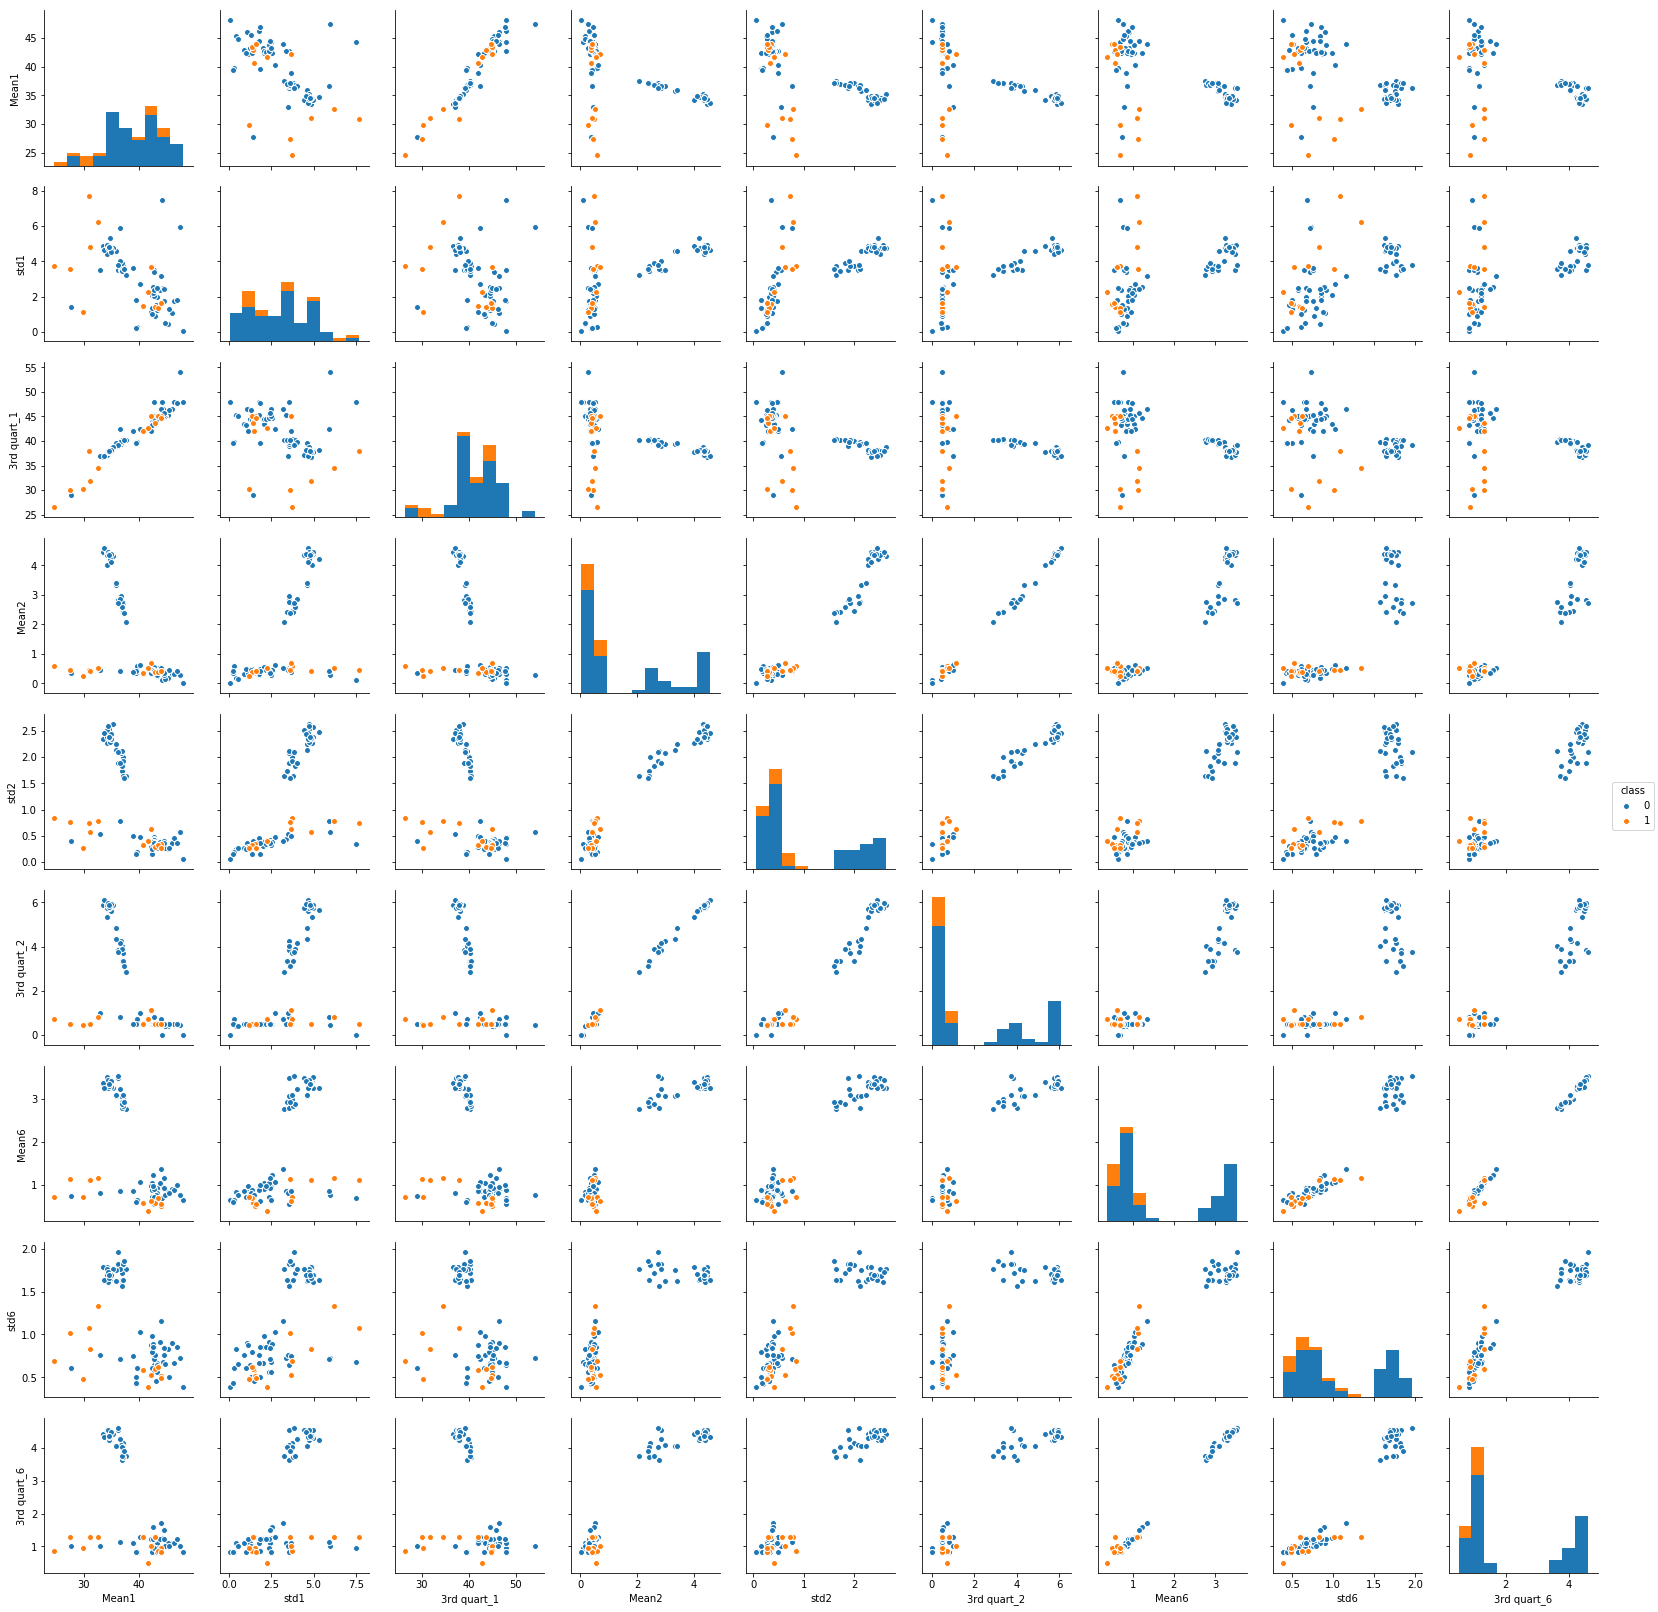

In [6]:
#Train test table
test_instances = pd.concat([Inst_Table.iloc[0:2], Inst_Table.iloc[7:9], Inst_Table.iloc[13:17], Inst_Table.iloc[28:32],
                            Inst_Table.iloc[43:46], Inst_Table.iloc[58:62], Inst_Table.iloc[73:76]])

train_instances = Inst_Table.loc[~Inst_Table.index.isin(test_instances.index)]

train_test_table = pd.concat([test_instances, train_instances], ignore_index = True)
         



Imp_features = train_test_table[['Instance', 'Mean1', 'std1', '3rd quart_1', 'Mean2', 'std2', '3rd quart_2',
                      'Mean6', 'std6', '3rd quart_6', 'class']]


y = train_test_table.iloc[:, -1]
y_tst = train_test_table.iloc[:4, -1]
y_trn = y.loc[~y.index.isin(y_tst.index)]

#Scatterplot
import seaborn as sns
grid = sns.pairplot(data=Imp_features, kind='scatter', vars =['Mean1', 'std1', '3rd quart_1', 'Mean2', 'std2', '3rd quart_2', 
           'Mean6', 'std6', '3rd quart_6'], hue='class', diag_kind='hist')
plt.show()

Breaking each time series in the training set into two (approximately) equal length time series. Now instead of 6 time series for each of the 88 instances, we have 12 time series for each instance. Repeat the experiment in 1(d)i.

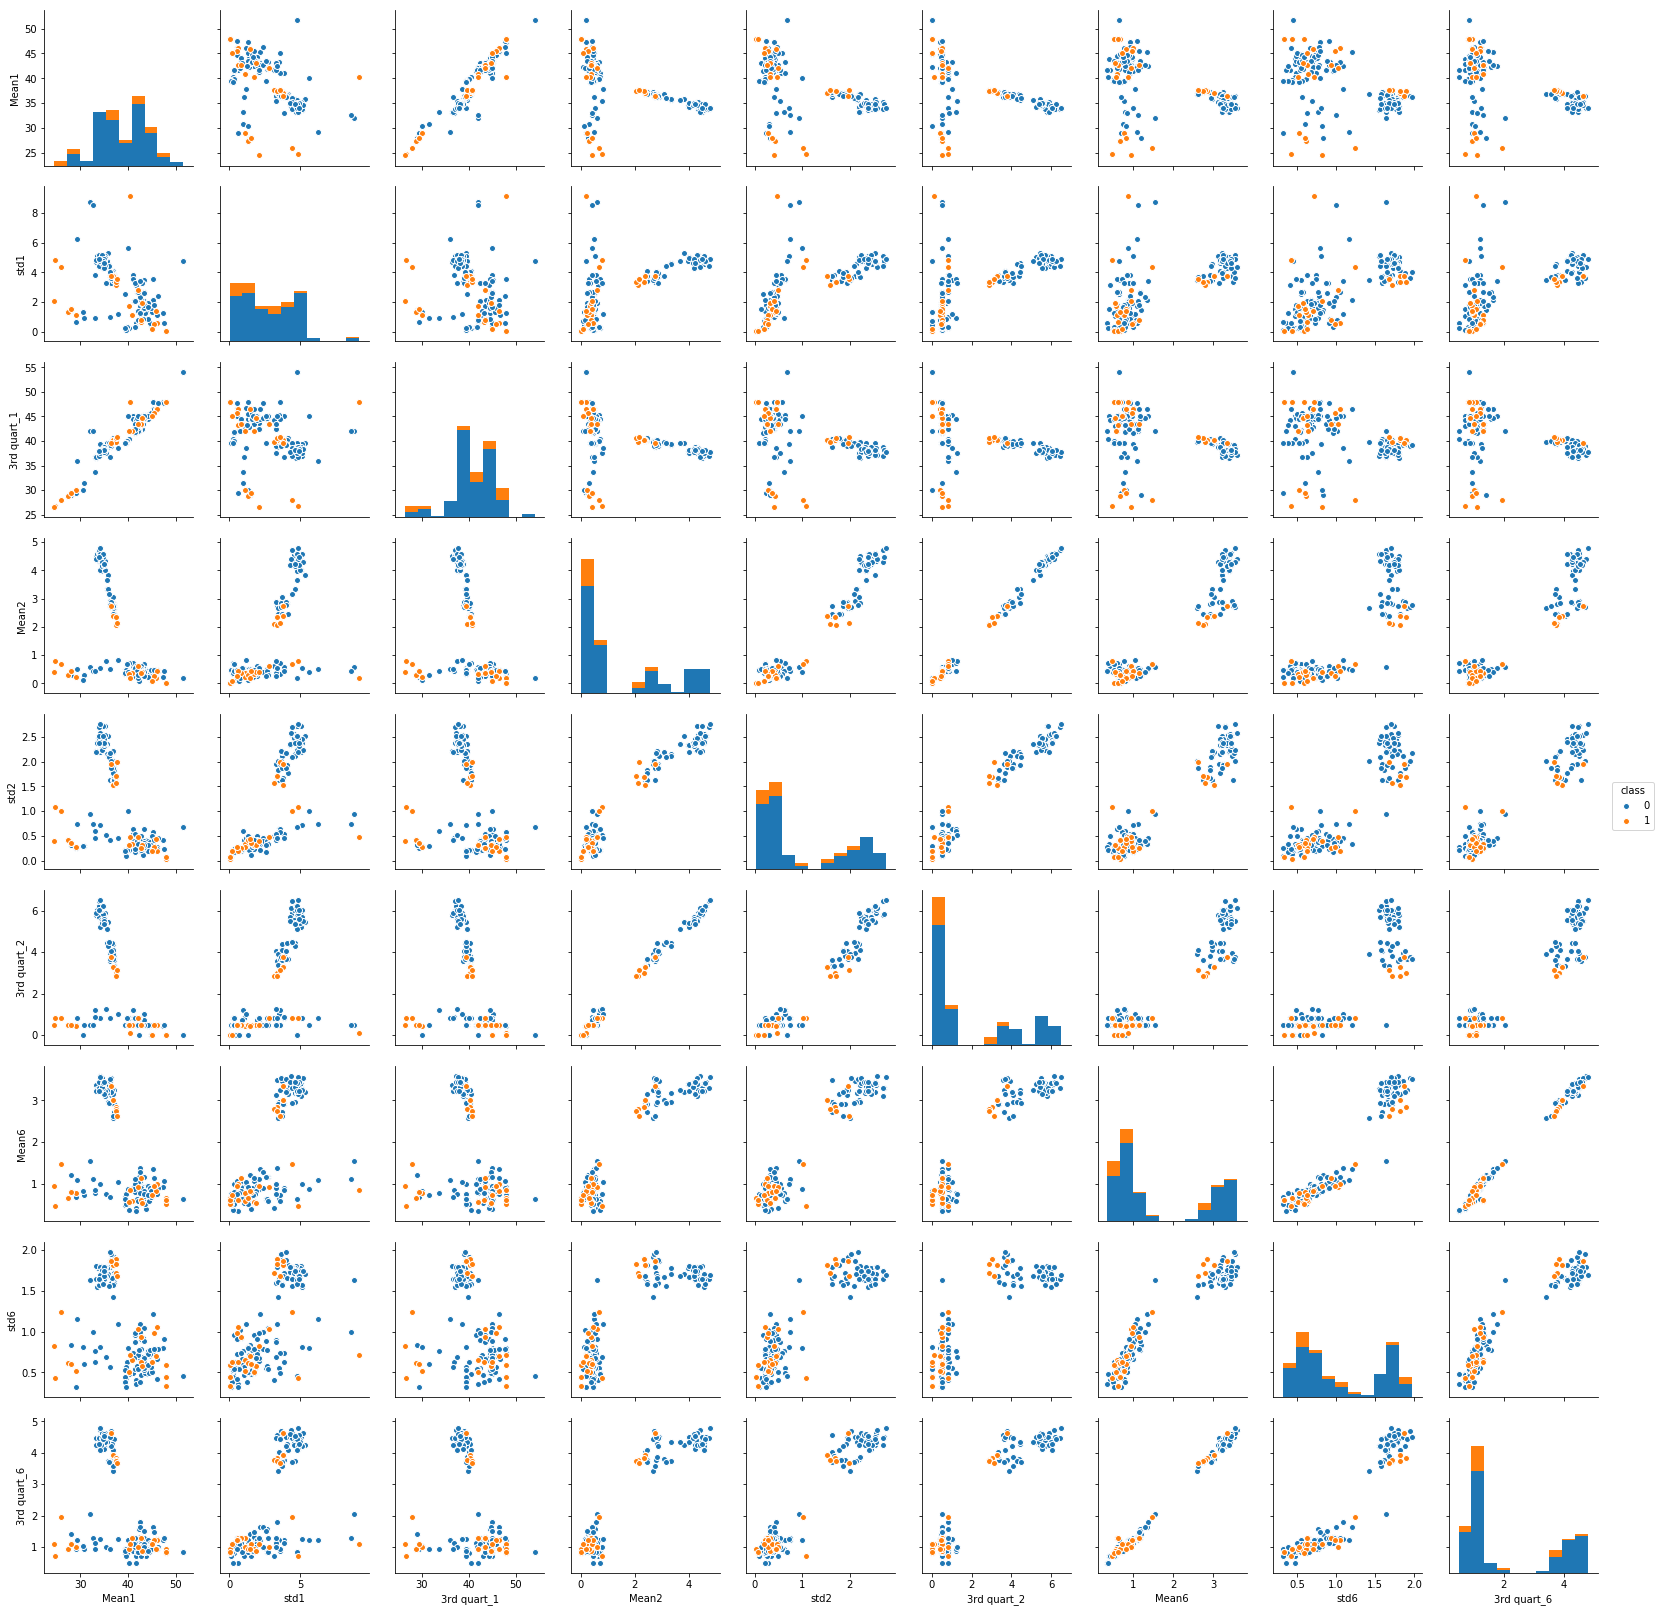

In [7]:
Name2 = [ 'Mean1', 'std1', '3rd quart_1', 'Mean2', 'std2', '3rd quart_2',
                     'Mean6', 'std6', '3rd quart_6', 'class']
def split_inst(df, l):
   #try:
   length = 480//l 
   table = pd.DataFrame(np.zeros(((len(df)//length)+1, 43)), columns=Name)
   table['class'] = 0
   table.iloc[:13*l, -1] = 1
   t= 0
   for i in range(0, len(df), length):
       instance = df.iloc[i:i+length]
       j = 0
       for k in range(0, 6):
           table.iloc[t, j+1] = instance.iloc[0:length, k+1].min()
           table.iloc[t, j+2] = instance.iloc[0:length, k+1].max()
           table.iloc[t, j+3] = instance.iloc[0:length, k+1].mean()
           table.iloc[t, j+4] = instance.iloc[0:length, k+1].median()
           table.iloc[t, j+5] = instance.iloc[0:length, k+1].std()
           table.iloc[t, j+6] = instance.iloc[0:length, k+1].quantile(q=.25)
           table.iloc[t, j+7] = instance.iloc[0:length, k+1].quantile(q=.75)    
           j = j+7
       t = t+1        
   return table  

New_table = split_inst(Data_test_train, 2)
New_table_features = New_table[Name2]

grid = sns.pairplot(data=New_table_features, kind ='scatter', vars = [ 'Mean1', 'std1', '3rd quart_1', 
                                                                      'Mean2', 'std2', '3rd quart_2',
                     'Mean6', 'std6', '3rd quart_6'] , hue ='class', diag_kind='hist')
plt.show()

(iii) Breaking each time series in the training set into l = (1; 2; : : : ; 20) time series of approximately equal length and using logistic regression to solve the binary classification problem, using time-domain features.
Class sklearn.feature selection.RFECV is used to find the optimal or pruned set of features among total features.
Using 5-fold cross-validation to determine the best value of l. The right way to perform cross validation is to use it for feature selection as well as to find best l. And not just for finding the best l. 

#### RFECV used instead of p-values to fined pruned features

In [18]:
def trn_tst_split(df, l):
   test_inst = pd.concat([df.iloc[0:2*l], df.iloc[7*l:9*l], df.iloc[13*l:16*l], df.iloc[28*l:31*l],
                            df.iloc[43*l:46*l], df.iloc[58*l:61*l], df.iloc[73*l:76*l]]) 
   train_inst = df.loc[~df.index.isin(test_inst.index)]
   t_t_table = pd.concat([test_inst, train_inst], ignore_index = True)
   y1 = t_t_table.iloc[:, -1]     
   y_test =  y1.iloc[:19*l]
   y_train = y1.loc[~y1.index.isin(y_test.index)]
   X_test = df.iloc[:19*l, 0:-1]
   X_train = t_t_table.loc[~t_t_table.index.isin(X_test.index)]
   X_train = X_train.drop(['Instance', 'class'], axis=1)
   X_test = X_test.drop(['Instance'], axis=1)
   ls = [X_train, y_train, X_test, y_test]
   return ls

#Using RFECV:   
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV, RFE
from sklearn import metrics
best_l = 0
best_score = 0
for l in range(1,21):
     matrix = split_inst(Data_test_train, l)
     ls = trn_tst_split(matrix, l)
     X_train = ls[0]
     y_train = ls[1]
     model = LogisticRegression(C=1e5)
     rfecv_tr = RFECV(model , cv=5, scoring='accuracy')
     rfecv_tr.fit(X_train, y_train)
     array = np.array(X_train.columns.values)
     cv_score = max(rfecv_tr.grid_scores_)
     if cv_score > best_score:
        best_score = cv_score
        best_l = l
        no_optimal_feature = rfecv_tr.n_features_
        optimal_features = array[rfecv_tr.support_]
        y_train_optimal = y_train
        X_train_optimal = X_train[optimal_features]
        y_test_optimal = ls[3]
        X_test_optimal = ls[2][optimal_features]



In [17]:
#Summarization of attributes
print('OPTIMAL FEATURES', optimal_features)
print ('The optimal l is', best_l)
print ('The cross validation accuracy for optimal l is', best_score)

        
#For optimal l and corresponding optimal features refitting the logistic regression model     
log_tr = model.fit(X_train_optimal, y_train_optimal)

OPTIMAL FEATURES ['Mean6' '1st quart_6']
The optimal l is 13
The cross validation accuracy for optimal l is 0.8759430398140076


(iv) Showing the confusion matrix and the ROC and AUC for the classifier on train data. Reporting the parameters of logistic regression model beta's as well as the p-values associated with them.

         Current function value: 0.432863
         Iterations: 5
Betas for training data [[ 1.28380697 -2.36756392]]
Confusion matrix for training data [[810   0]
 [117   0]]
accuracy for training data 0.8737864077669902


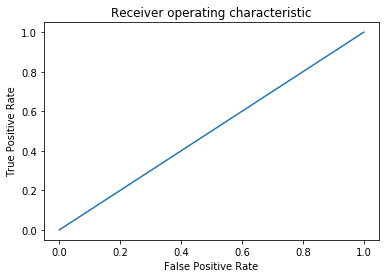

In [65]:
#d iv:
# On train data
false_PR, true_PR, threshold = metrics.roc_curve(y_train_optimal, log_tr.predict(X_train_optimal))
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(false_PR, true_PR)
AUC_tr = metrics.roc_auc_score(y_train_optimal, log_tr.predict(X_train_optimal))

betas_tr = log_tr.coef_
 
import statsmodels.api as sm
lgt = sm.Logit(y_train_optimal, X_train_optimal)
smy = lgt.fit(maxiter=5)
smy.summary2()                                                          #Summary containing p-values for train data



#Output
print('Betas for training data', betas_tr)
print('Confusion matrix for training data', metrics.confusion_matrix(y_train_optimal, log_tr.predict(X_train_optimal)))
print("accuracy for training data", log_tr.score(X_train_optimal, y_train_optimal))

(V) Testing the classifier on the test set. The time series in the test set is broken into the same number of time series into which training set was. The classifier has been tested using the features extracted from the test set. 
Comparing the accuracy on the test set with the cross-validation accuracy we obtained previously.


         Current function value: 0.396469
         Iterations: 5
Betas for testing data [[ 1.28380697 -2.36756392]]
The confusion matrix for test data [[195   0]
 [ 52   0]]
Area Under Curve 0.537037037037037
accuracy on test data 0.7894736842105263


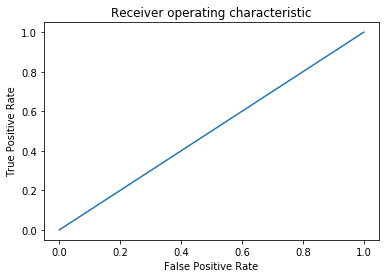

In [64]:
#d v:
#On test data
false_PR, true_PR, threshold = metrics.roc_curve(y_test_optimal, log_tr.predict(X_test_optimal))
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(false_PR, true_PR)
AUC_ts = metrics.roc_auc_score(y_test_optimal, log_tr.predict(X_test_optimal))

betas_ts = log_tr.coef_
 
import statsmodels.api as sm
lgt_ts = sm.Logit(y_test_optimal, X_test_optimal)
smy_ts = lgt_ts.fit(maxiter=5)
smy_ts.summary2()   #Summary containing p-values for test data

#Output
print('Betas for testing data', betas_ts)
print('The confusion matrix for test data', metrics.confusion_matrix(y_test_optimal, log_tr.predict(X_test_optimal)))
print('Area Under Curve', AUC)
log_ts = log_tr.predict(X_test_optimal)  #Predicting values for test
print('accuracy on test data', log_tr.score(X_test_optimal, y_test_optimal))

(vi) Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?
Ans: Yes, the classes seem to be well seperated from the confusion matrix and accuracy of logisitc regression model to cause instability in calculating logistic regression parameters.

(vii) From the confusion matrices you obtained, do you see imbalanced classes?
Ans: From previous confusion matrices we can see that the classes are imbalanced. We use case control sampling as techinique tot tackle this problem.

If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

In [47]:
#Under Sampling
from imblearn.under_sampling import RandomUnderSampler
best_l = 0
best_score = 0
for l in range(1,21):
     matrix = split_inst(Data_test_train, l)
     ls = trn_tst_split(matrix, l)
     X_train_cc = ls[0]
     y_train_cc = ls[1]
     array = np.array(X_train_cc.columns.values)
     RUS = RandomUnderSampler()
     X_train_cc, y_train_cc = RUS.fit_sample(X_train_cc, y_train_cc) 
     model = LogisticRegression()
     rfecv_tr = RFECV(model , cv=5, scoring='accuracy')
     rfecv_tr.fit( X_train_cc, y_train_cc)
     cv_score = max(rfecv_tr.grid_scores_)
     if cv_score > best_score:
        best_score = cv_score
        best_l = l
        no_optimal_feature = rfecv_tr.n_features_
        best_features = array[rfecv_tr.support_]
        y_train_optimal_cc = y_train_cc
        X_train_optimal_cc = X_train_cc[:,rfecv_tr.support_]
        y_test_optimal_cc = ls[3]
        X_test_optimal_cc = ls[2].values[:, rfecv_tr.support_]

In [48]:
print('The optimal features are', best_features)

The optimal features are ['3rd quart_2' '3rd quart_4' 'std6']


The confusion matrix is [[53 19]
 [16 56]]
The AUC train data is 0.7569444444444444
The confusion matrix is [[45 75]
 [14 18]]
The AUC for test data is 0.46875


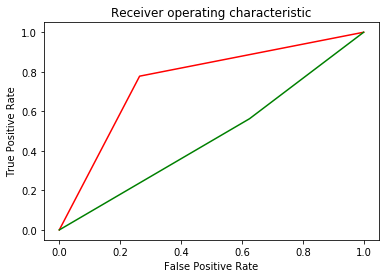

In [50]:
#For train data
RUS = RandomUnderSampler()
X_train_optimal_cc, y_train_optimal_cc = RUS.fit_sample(X_train_optimal_cc, y_train_optimal_cc) 
log_tr_cc = model.fit(X_train_optimal_cc, y_train_optimal_cc)
print('The confusion matrix is', metrics.confusion_matrix(y_train_optimal_cc, log_tr_cc.predict(X_train_optimal_cc)))
false_UPR, true_UPR, threshold = metrics.roc_curve(y_train_optimal_cc, log_tr_cc.predict(X_train_optimal_cc))
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(false_UPR, true_UPR, color='red', label='Train ROC')
AUCU = metrics.roc_auc_score(y_train_optimal_cc, log_tr_cc.predict(X_train_optimal_cc))
print('The AUC train data is', AUCU)

#For test data
print('The confusion matrix is', metrics.confusion_matrix(y_test_optimal_cc, log_tr_cc.predict(X_test_optimal_cc)))
false_UPR, true_UPR, threshold = metrics.roc_curve(y_test_optimal_cc, log_tr_cc.predict(X_test_optimal_cc))
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(false_UPR, true_UPR, color='green', label='Test ROC')
AUCU = metrics.roc_auc_score(y_test_optimal_cc, log_tr_cc.predict(X_test_optimal_cc))
print('The AUC for test data is', AUCU)

### (e)Binary Classification Using L1-penalized logistic regression

Repeat 1(d)iii using L1-penalized logistic regression, i.e. instead of using pvalues for variable selection, using L1 regularization. Here we cross-validate for both l, the number of time series into which we break each of our instances, and lambda, the weight of L1 penalty in your logistic regression objective function (or C, the budget). 

In [52]:
#E)Binary Classication Using L1-penalized logistic regression:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
best_score_l1 = 0
best_C_l1 = 0
C = []
for l in range(1,21):
     matrix_l1 = split_inst(Data_test_train, l)
     ls = trn_tst_split(matrix_l1, l)
     X_train_l1 = ls[0]
     y_train_l1 = ls[1]
     stdl1 = StandardScaler()                                                          #Standardization of data
     X_train_l1 = stdl1.fit_transform(X_train_l1)                                      #Standardization of data   
     model = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5)
     logreg = model.fit(X_train_l1, y_train_l1)
     cv_score_l1 = cross_val_score(logreg, X_train_l1, y_train_l1, cv=StratifiedKFold(5), scoring='accuracy')
     cv_l1 = np.mean(cv_score_l1)
     if cv_l1 > best_score_l1:
        best_score_l1 = cv_score
        best_l_l1 = l
        C.append(logreg.C_[0])
optimal_C = min(C)                      #Inverse of lambda 
#Summarization of attributes
print ('The optimal l is', best_l_l1)
print ('The cross validation accuracy for optimal l is', best_score_l1)

The optimal l is 9
The cross validation accuracy for optimal l is 0.6867647058823529


### (f) Multi-class Classification (The Realistic Case)

Find the best l using L1 penalized logistic regression to build an L1-penalized multinomial regression model to classify all activities in the training set. 

In [53]:
#F)i)Multi-class Classication:

def split_inst_mult(df, l):
   length = 480//l 
   table = pd.DataFrame(np.zeros(((len(df)//length)+1, 43)), columns=Name)
   table['class'] = 0
   table.iloc[:7*l, -1] = 1
   table.iloc[7*l:13*l, -1] = 2
   table.iloc[13*l:28*l, -1] = 3
   table.iloc[28*l:43*l, -1] = 4
   table.iloc[43*l:58*l, -1] = 5
   table.iloc[58*l:73*l, -1] = 6
   table.iloc[73*l:88*l, -1] = 7
   t= 0
   for i in range(0, len(df), length):
       instance = df.iloc[i:i+length]
       j = 0
       for k in range(0, 6):
           table.iloc[t, j+1] = instance.iloc[0:length, k+1].min()
           table.iloc[t, j+2] = instance.iloc[0:length, k+1].max()
           table.iloc[t, j+3] = instance.iloc[0:length, k+1].mean()
           table.iloc[t, j+4] = instance.iloc[0:length, k+1].median()
           table.iloc[t, j+5] = instance.iloc[0:length, k+1].std()
           table.iloc[t, j+6] = instance.iloc[0:length, k+1].quantile(q=.25)
           table.iloc[t, j+7] = instance.iloc[0:length, k+1].quantile(q=.75)    
           j = j+7
       t = t+1        
   return table 

best_score_mult = 0
for l in range(1,21):
     matrix_mult = split_inst_mult(Data_test_train, l)
     ls = trn_tst_split(matrix_mult, l)
     X_train_mult = ls[0]
     y_train_mult = ls[1]
     stdmul = StandardScaler()                                                           #Standardization of data
     X_train_l1 = stdmul.fit_transform(X_train_mult)                                     #Standardization of data
     model = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=10)
     logreg_mult = model.fit(X_train_mult, y_train_mult)
     accuracy_mult = logreg_mult.score(X_train_mult, y_train_mult)
     array = np.array(X_train_mult.columns.values)
     if accuracy_mult > best_score_mult:
        best_score_mult = accuracy_mult
        best_l_mult = l       
        logreg_mult1 = logreg_mult 
        y_train_optimal_mult = y_train_mult
        X_train_optimal_mult = X_train_mult
        y_test_optimal_mult = ls[3]
        X_test_optimal_mult = ls[2]

In [54]:
test_error_mult = 1-logreg_mult1.score(X_test_optimal_mult, y_test_optimal_mult)
print('The test error is', test_error_mult)
print('Confusion matrix for multinomial logistic regression', 
      metrics.confusion_matrix(y_test_optimal_mult, logreg_mult1.predict(X_test_optimal_mult))) 

The test error is 0.5789473684210527
Confusion matrix for multinomial logistic regression [[0 0 2 0 0 0 0]
 [1 0 1 0 0 0 0]
 [0 0 2 0 0 0 1]
 [0 0 0 0 2 1 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]


(ii) Repeating 1(f)i using a Naive Bayes' classifier. Using both Gaussian and Multinomial priors and comparing the results.

In [56]:
#F)ii)Naive Bayes Classication:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

best_score_g = 0
best_score_m = 0
for l in range(1,21):
     matrix_nb = split_inst_mult(Data_test_train, l)
     ls = trn_tst_split(matrix_nb, l)
     X_train_nb = ls[0]
     y_train_nb = ls[1]
     gauss = GaussianNB()
     multinom = MultinomialNB()
     logreg_g = gauss.fit(X_train_nb, y_train_nb)
     logreg_m = multinom.fit(X_train_nb, y_train_nb)
     accuracy_g = logreg_g.score(X_train_nb, y_train_nb)
     accuracy_m = logreg_m.score(X_train_nb, y_train_nb) 
     if accuracy_g > best_score_g:
        best_score_g = accuracy_g
        best_l_g = l       
        logreg_g1 = logreg_g 
        y_train_optimal_g = y_train_nb
        X_train_optimal_g = X_train_nb
        y_test_optimal_g = ls[3]
        X_test_optimal_g = ls[2]
     if accuracy_m > best_score_m:
        best_score_m = accuracy_m
        best_l_m = l       
        logreg_m1 = logreg_m 
        y_train_optimal_m = y_train_nb
        X_train_optimal_m = X_train_nb
        y_test_optimal_m = ls[3]
        X_test_optimal_m = ls[2]         
        

In [57]:
#For Gausssian
test_error_g = 1-logreg_g1.score(X_test_optimal_g, y_test_optimal_g)
print('The test error for naive bayes with gaussian priors is', test_error_g)
print('Confusion matrix with Gaussian priors for Naive bayes', 
      metrics.confusion_matrix(y_test_optimal_g, logreg_g1.predict(X_test_optimal_g)))
                    
#For Multinomial 
test_error_m = 1-logreg_m1.score(X_test_optimal_m, y_test_optimal_m) 
print('The test error for naive bayes with multinomial priors is', test_error_g)
print('Confusion matrix with Multinomial priors for Naive bayes', 
      metrics.confusion_matrix(y_test_optimal_m, logreg_m1.predict(X_test_optimal_m)))
 

The test error for naive bayes with gaussian priors is 0.6842105263157895
Confusion matrix with Gaussian priors for Naive bayes [[0 0 2 0 0 0 0]
 [2 0 0 0 0 0 0]
 [2 0 0 1 0 0 0]
 [0 1 0 0 2 0 0]
 [0 2 0 0 0 1 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]
The test error for naive bayes with multinomial priors is 0.6842105263157895
Confusion matrix with Multinomial priors for Naive bayes [[0 0 4 0 0 0 0]
 [1 0 3 0 0 0 0]
 [2 0 0 3 0 0 1]
 [0 3 0 0 3 0 0]
 [0 1 0 0 2 3 0]
 [0 1 0 0 3 2 0]
 [0 0 0 0 0 0 6]]


For this problem of multi-class classification the L1-penalized Multinomial logistic regression is better than Naive bayes classifier as can be observed from the from the test errors values. 